# 📌 IMDb Movie Data Analysis Minor Project Extended

### Name: Shubham Satish Mahindrakar

### This notebook presents unique and insightful analysis of the IMDb movie dataset as part of a machine learning internship minor project. Each section includes code and visualizations to explore trends and patterns from the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from collections import Counter

## Load dataset

In [2]:
data = pd.read_csv("IMDB-Movie-Data.csv")
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## 1) What is the distribution of movie durations?

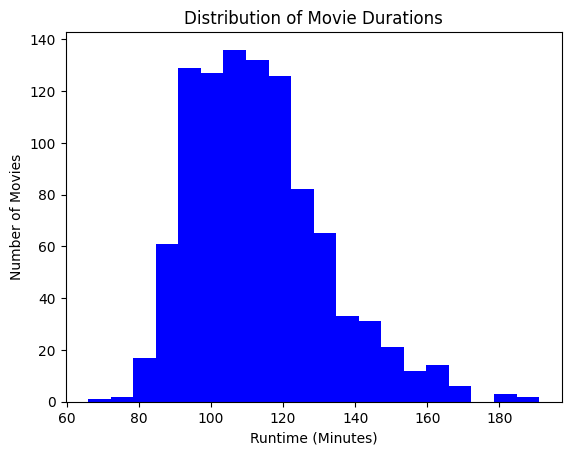

In [3]:
plt.hist(data['Runtime (Minutes)'].dropna(), bins=20, color='blue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Number of Movies')
plt.show()


## 2) Which director has the highest average IMDB rating?

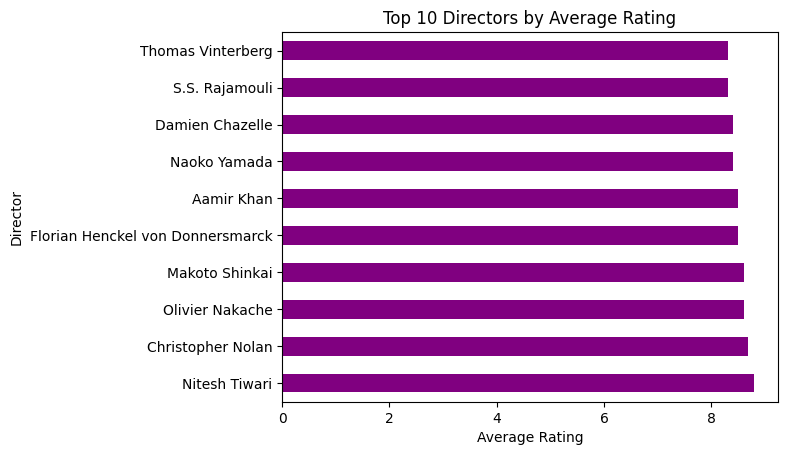

In [4]:
top_directors = data.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)
top_directors.plot(kind='barh', color='purple')
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Average Rating')
plt.show()


## 3) Correlation heatmap between numerical features (like Rating, Revenue, Votes, etc.)

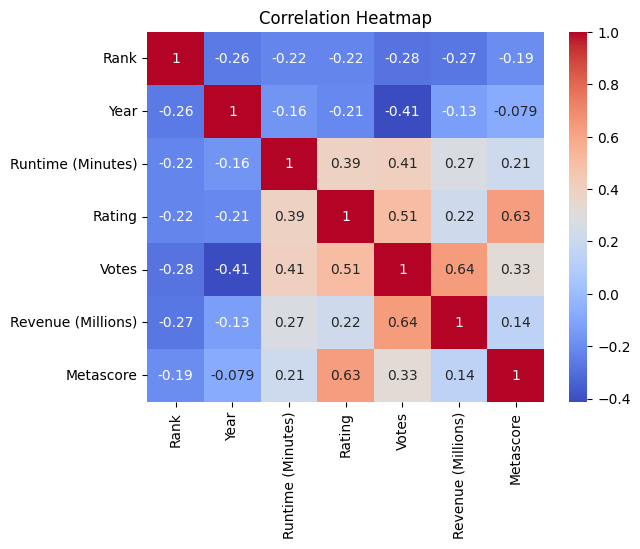

In [5]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## 4) Trend of movies released per year

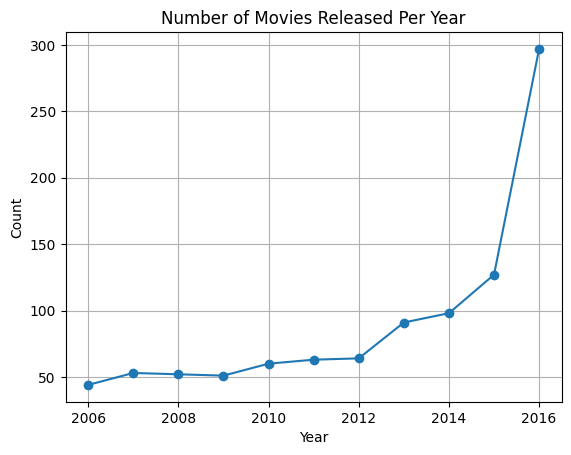

In [6]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y', errors='coerce')
data['Year'].dt.year.value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()


## 5) Which genres are most profitable on average (based on Revenue)?

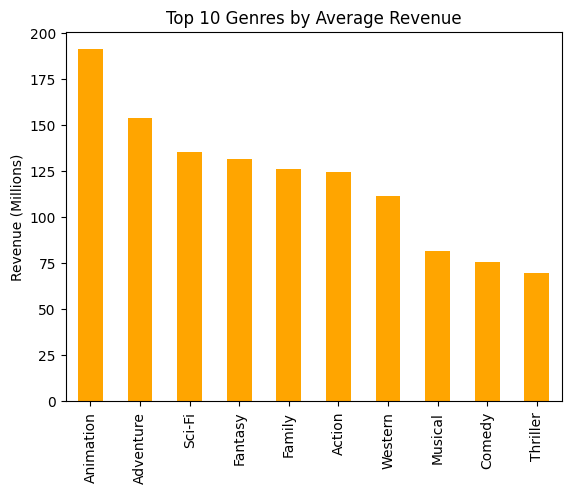

In [7]:
from collections import defaultdict
genre_revenue = defaultdict(list)
for i, row in data.iterrows():
    genres = str(row['Genre']).split(',')
    for genre in genres:
        genre_revenue[genre.strip()].append(row['Revenue (Millions)'])
avg_revenue = {k: np.nanmean(v) for k, v in genre_revenue.items()}
pd.Series(avg_revenue).sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Genres by Average Revenue')
plt.ylabel('Revenue (Millions)')
plt.show()


## 6) Compare ratings of movies with revenue > 100M vs <= 100M

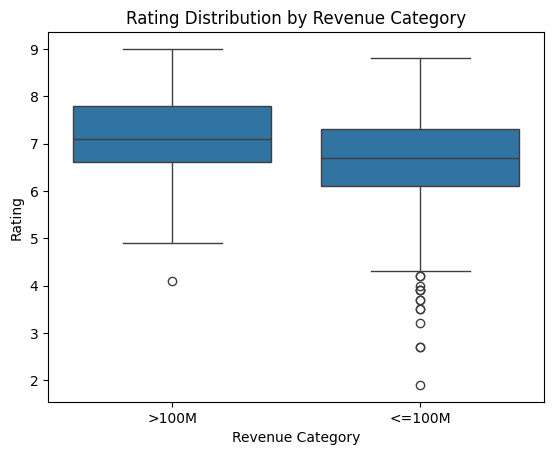

In [8]:
data['Revenue Category'] = np.where(data['Revenue (Millions)'] > 100, '>100M', '<=100M')
sns.boxplot(x='Revenue Category', y='Rating', data=data)
plt.title('Rating Distribution by Revenue Category')
plt.show()


## 7) Top 5 actors who appeared most frequently

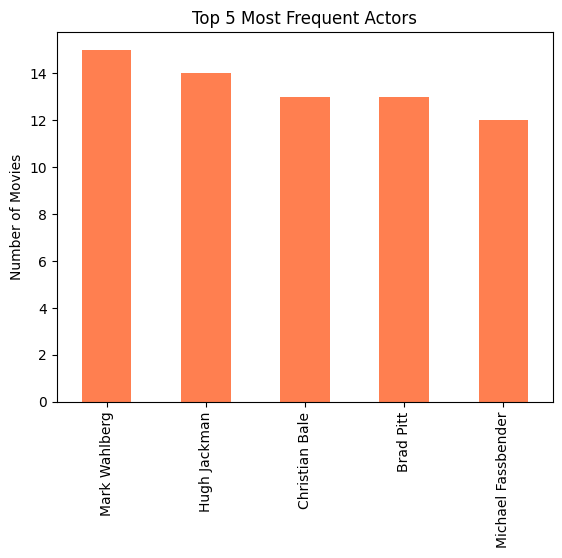

In [9]:
from collections import Counter
actors = Counter()
for cast in data['Actors']:
    for actor in cast.split(','):
        actors[actor.strip()] += 1
pd.Series(dict(actors.most_common(5))).plot(kind='bar', color='coral')
plt.title('Top 5 Most Frequent Actors')
plt.ylabel('Number of Movies')
plt.show()


## 8) Relationship between rating and number of votes

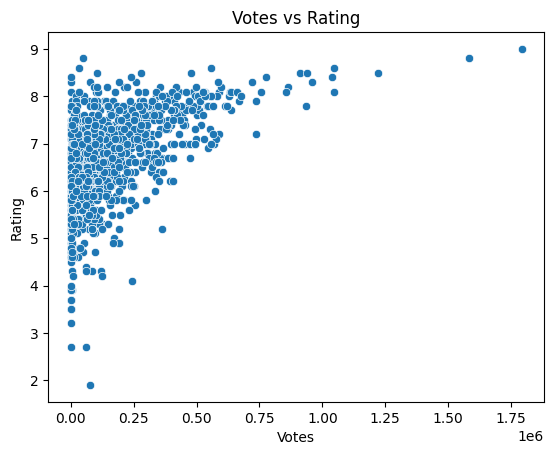

In [10]:
sns.scatterplot(x='Votes', y='Rating', data=data)
plt.title('Votes vs Rating')
plt.show()


## 9) Find the most common genre combinations

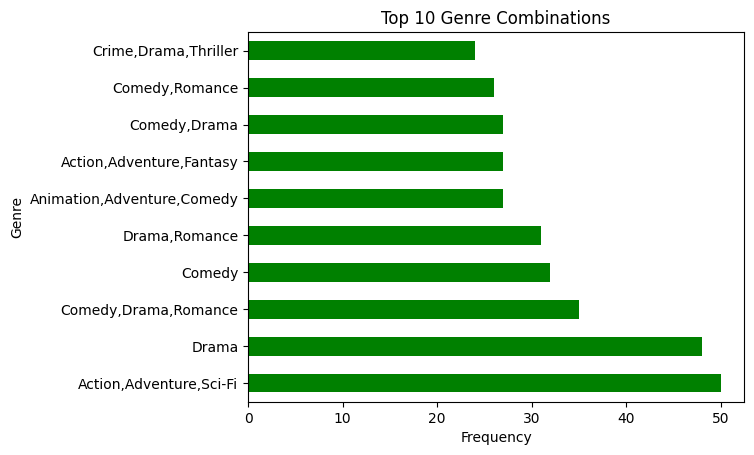

In [11]:
genre_combos = data['Genre'].value_counts().head(10)
genre_combos.plot(kind='barh', color='green')
plt.title('Top 10 Genre Combinations')
plt.xlabel('Frequency')
plt.show()


## 10) Which genres receive the highest ratings on average?

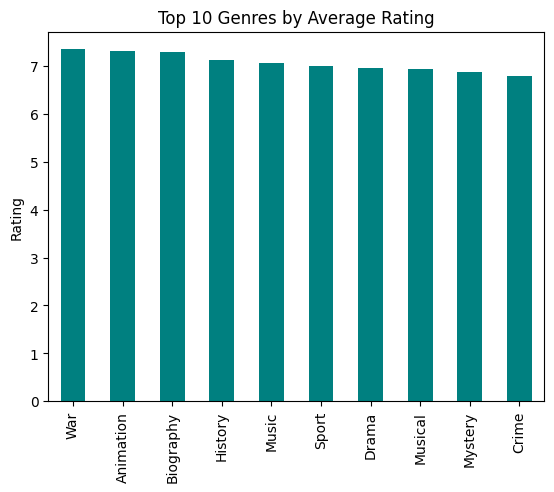

In [12]:
genre_rating = defaultdict(list)
for i, row in data.iterrows():
    genres = str(row['Genre']).split(',')
    for genre in genres:
        genre_rating[genre.strip()].append(row['Rating'])
avg_rating = {k: np.nanmean(v) for k, v in genre_rating.items()}
pd.Series(avg_rating).sort_values(ascending=False).head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Genres by Average Rating')
plt.ylabel('Rating')
plt.show()


## 11) Do movies with more votes tend to have higher revenue?

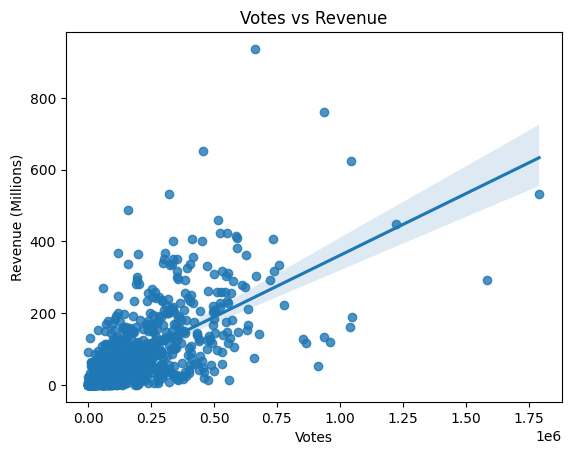

In [13]:
sns.regplot(x='Votes', y='Revenue (Millions)', data=data)
plt.title('Votes vs Revenue')
plt.show()


## 12) Find movies where rating and revenue both are in top 10%

In [14]:
high_rating = data['Rating'] >= data['Rating'].quantile(0.9)
high_revenue = data['Revenue (Millions)'] >= data['Revenue (Millions)'].quantile(0.9)
top_movies = data[high_rating & high_revenue]
top_movies[['Title', 'Rating', 'Revenue (Millions)']]


,Title,Rating,Revenue (Millions)
0,Guardians of the Galaxy,8.1,333.13
12,Rogue One,7.9,532.17
33,Deadpool,8.0,363.02
35,Captain America: Civil War,7.9,408.08
50,Star Wars: Episode VII - The Force Awakens,8.1,936.63
54,The Dark Knight,9.0,533.32
74,Zootopia,8.1,341.26
76,The Avengers,8.1,623.28
80,Inception,8.8,292.57
102,The Martian,8.0,228.43


## 13) Distribution of Revenue using KDE Plot

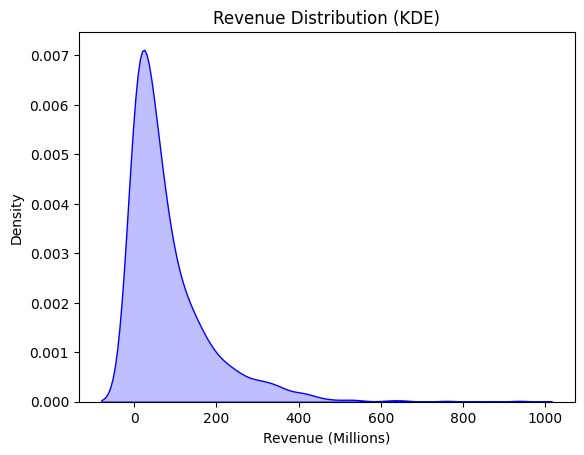

In [15]:
sns.kdeplot(data['Revenue (Millions)'].dropna(), fill=True, color='blue')
plt.title('Revenue Distribution (KDE)')
plt.xlabel('Revenue (Millions)')
plt.show()


## 14) Top 5 movies with the highest revenue per minute of runtime

In [16]:
data['Revenue per Minute'] = data['Revenue (Millions)'] / data['Runtime (Minutes)']
top_rpm = data[['Title', 'Revenue (Millions)', 'Runtime (Minutes)', 'Revenue per Minute']] \
    .sort_values(by='Revenue per Minute', ascending=False).head(5)
top_rpm.reset_index(drop=True)


,Title,Revenue (Millions),Runtime (Minutes),Revenue per Minute
0,Star Wars: Episode VII - The Force Awakens,936.63,136,6.886985
1,Jurassic World,652.18,124,5.259516
2,Finding Dory,486.29,97,5.013299
3,Avatar,760.51,162,4.694506
4,The Avengers,623.28,143,4.358601


## 15) Average rating and revenue for each genre (split multi-genres)

In [17]:
from collections import defaultdict

genre_stats = defaultdict(lambda: {'ratings': [], 'revenues': []})

for _, row in data.iterrows():
    genres = str(row['Genre']).split(',')
    for g in genres:
        genre = g.strip()
        genre_stats[genre]['ratings'].append(row['Rating'])
        genre_stats[genre]['revenues'].append(row['Revenue (Millions)'])

genre_df = pd.DataFrame([
    {'Genre': genre,
     'Average Rating': np.nanmean(stats['ratings']),
     'Average Revenue (Millions)': np.nanmean(stats['revenues'])}
    for genre, stats in genre_stats.items()
]).sort_values(by='Average Rating', ascending=False).reset_index(drop=True)

genre_df.head(10)  # display top 10 genres


,Genre,Average Rating,Average Revenue (Millions)
0,War,7.353846,53.433000
1,Animation,7.324490,191.223404
2,Biography,7.290123,55.801600
3,History,7.127586,52.923846
4,Music,7.075000,47.070000
5,Sport,7.011111,65.042500
6,Drama,6.953801,49.844205
7,Musical,6.940000,81.642000
8,Mystery,6.886792,54.627640
9,Crime,6.786667,61.804769


## 16) Distribution of ratings per genre (boxplot)

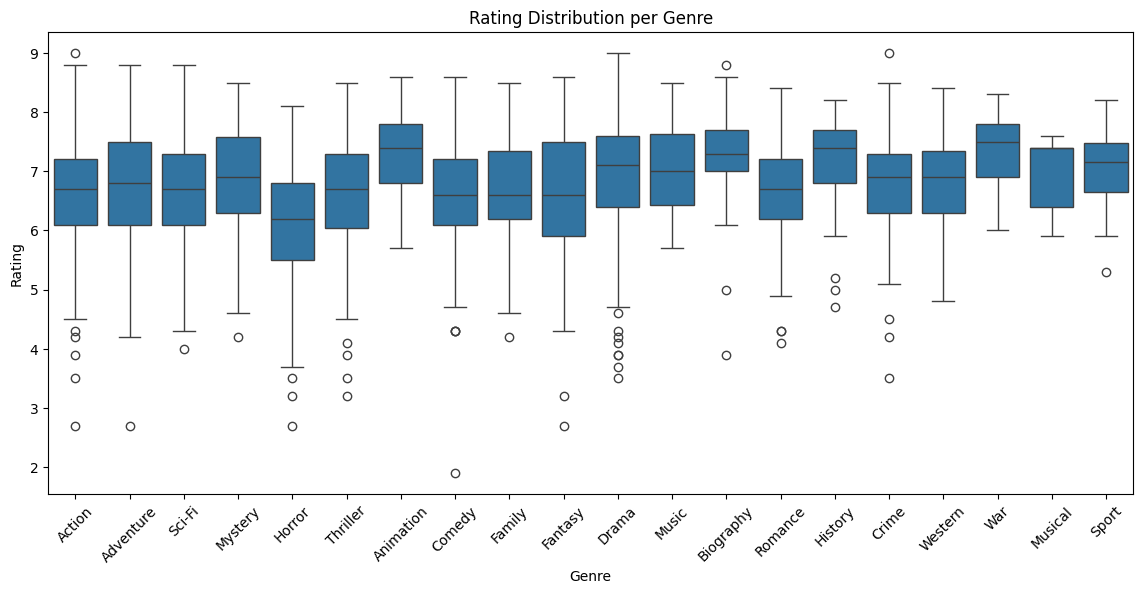

In [18]:
genre_list = []
for _, row in data.iterrows():
    for genre in str(row['Genre']).split(','):
        genre_list.append({'Genre': genre.strip(), 'Rating': row['Rating']})
genre_df = pd.DataFrame(genre_list)
plt.figure(figsize=(14, 6))
sns.boxplot(data=genre_df, x='Genre', y='Rating')
plt.xticks(rotation=45)
plt.title('Rating Distribution per Genre')
plt.show()


## Thank You